# Introducción a ETL en Python

<h3> Luis Alejandro Vejarano Gutierrez </h3>

<br>

<p> Este es mi inicio en Notebooks de Python

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/640px-Python-logo-notext.svg.png" width="100px">

In [ ]:
import pandas as pd
import seaborn as sns
import sqlite3

## Extracción

In [ ]:
url = 'https://raw.githubusercontent.com/freevejarano/DatasetsML/main/titanic.csv'
df = pd.read_csv(url)

### Análisis Exporatorio

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S


PassengerId: Identificador único del pasajero.

Survived: Indicador si el pasajero sobrevivió o no (0 = No, 1 = Sí).

Pclass: Clase en la que viajaba el pasajero (1 = Primera, 2 = Segunda, 3 = Tercera).

Name: Nombre del pasajero.

Sex: Género del pasajero.

Age: Edad del pasajero.

SibSp: Número de hermanos/cónyuges a bordo.

Parch: Número de padres/hijos a bordo.

Ticket: Número de billete del pasajero.

Fare: Tarifa pagada por el pasajero.

Cabin: Número de cabina del pasajero.

Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Describe las columnas numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-31-db5e1ea41ef3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='seismic', annot=True)


<Axes: >

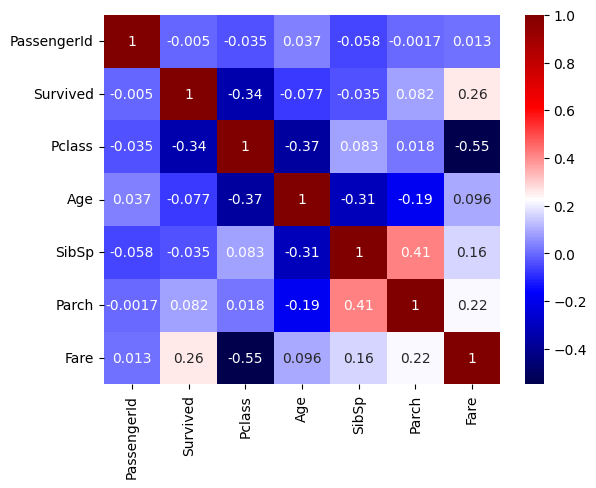

In [ ]:
sns.heatmap(df.corr(), cmap='seismic', annot=True)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

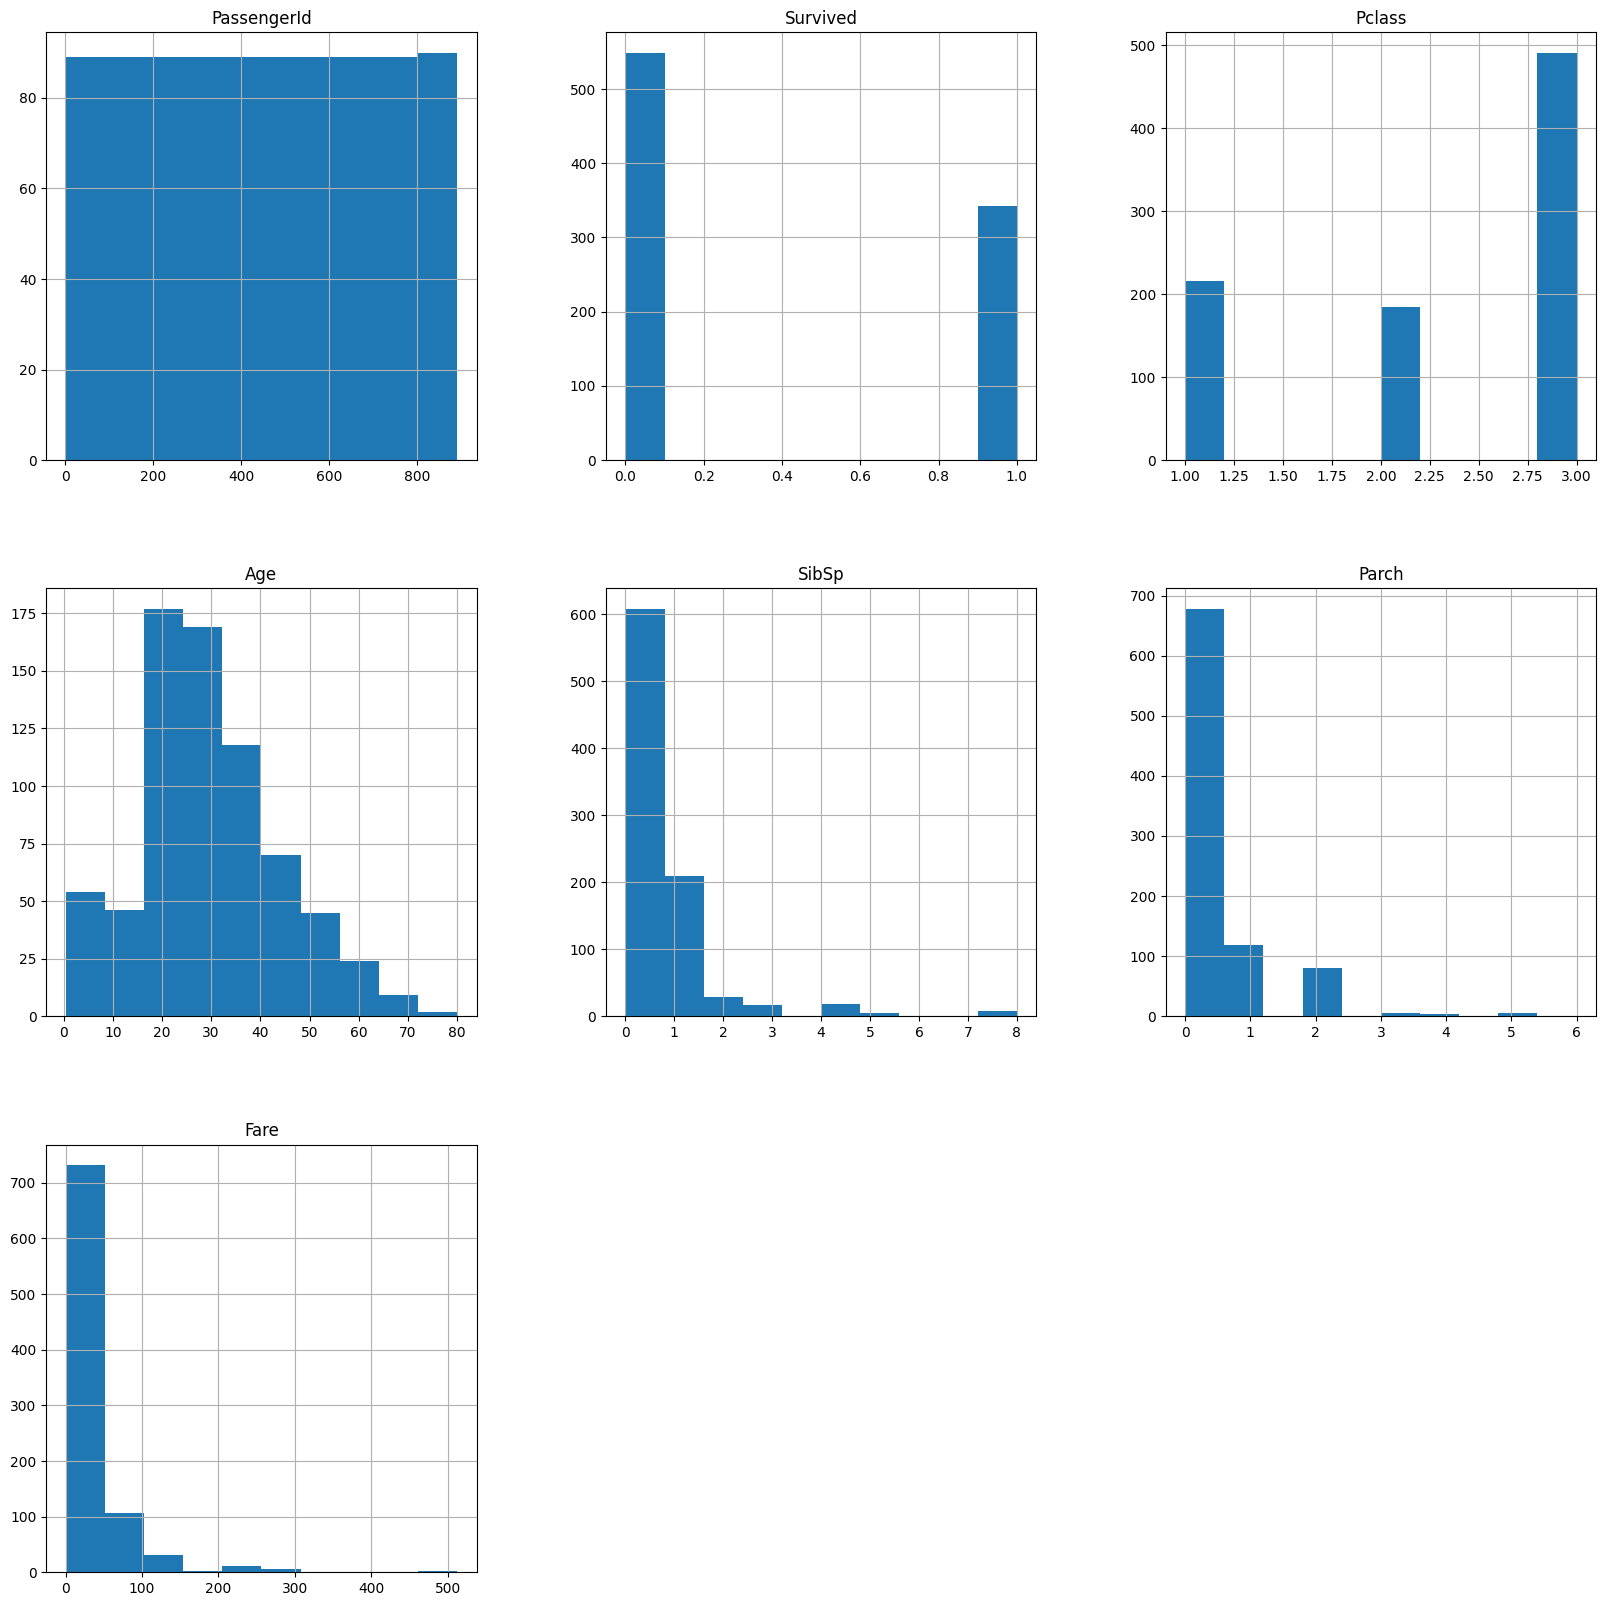

In [ ]:
df.hist(figsize=(20,20))

## Transformation

Eliminar las columnas menos relevantes

In [ ]:
df.drop(['Ticket','Cabin'], axis=1, inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [ ]:
# Filtro para los valores nulos
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S


In [ ]:
# Borrar nulos
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


In [ ]:
# Cambiar un tipo de dato
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
int(0.777)

0

In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
df['Age'].unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

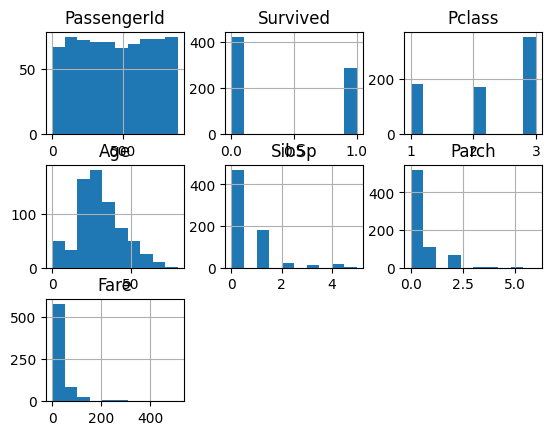

In [ ]:
df.hist()

<ipython-input-43-db5e1ea41ef3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='seismic', annot=True)


<Axes: >

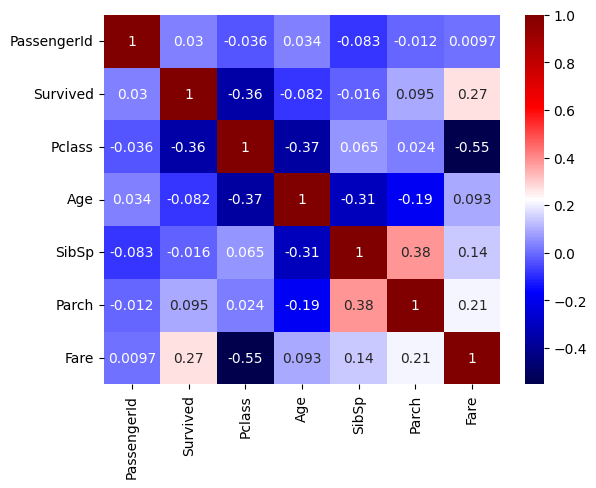

In [ ]:
sns.heatmap(df.corr(), cmap='seismic', annot=True)

## Load (Carga)

In [ ]:
conn = sqlite3.connect('titanic.db')
c = conn.cursor()
df.to_sql('pasajeros', conn, if_exists='replace', index=False)
conn.commit()

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

# SELECT

Traer una, varias o todas las columnas que le indiquemos

'*' → Todo

'tabla' → La forma en la que se almacena y consulta los registros

'Limit' → n de registros que va a devolver, es lo último que se tiene en cuenta

In [ ]:
query = 'SELECT PassengerId, Survived FROM pasajeros LIMIT 5;'
c.execute(query)

for x in c.fetchall():
  print(x)

(1, 0)
(2, 1)
(3, 1)
(4, 1)
(5, 0)


# WHERE

Filtro de los registros

Indico una condición para traer los registros

'>'

'<'

'>= <='

'='


Más de un filtro

AND

OR


In [ ]:
query = 'SELECT Name, Survived, Fare FROM pasajeros WHERE Fare > 50 and Survived = 1   LIMIT 5;'
c.execute(query)

for x in c.fetchall():
  print(x)

('Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 1, 71.2833)
('Futrelle, Mrs. Jacques Heath (Lily May Peel)', 1, 53.1)
('Harper, Mrs. Henry Sleeper (Myna Haxtun)', 1, 76.7292)
('Bing, Mr. Lee', 1, 56.4958)
('Fortune, Miss. Mabel Helen', 1, 263.0)


# Groupby

Agrupa por columnas con base en una función de agregación

count

max

min

mean

In [ ]:
df[['PassengerId','Survived']].groupby('Survived').count()

,PassengerId
Survived,
0,424
1,288


In [ ]:
query = 'SELECT Survived, COUNT(*) FROM pasajeros GROUP BY Survived LIMIT 5;'
c.execute(query)

for x in c.fetchall():
  print(x)

(0, 424)
(1, 288)


# Order by


Ordena el resultado de la consulta

ASC → ascendente

DESC → Descendente

In [ ]:
query = 'SELECT PassengerId, Name, Survived, Fare FROM pasajeros WHERE Fare > 0 ORDER BY Fare ASC  LIMIT 5;'
c.execute(query)

for x in c.fetchall():
  print(x)

(379, 'Betros, Mr. Tannous', 0, 4.0125)
(873, 'Carlsson, Mr. Frans Olof', 0, 5.0)
(327, 'Nysveen, Mr. Johan Hansen', 0, 6.2375)
(844, 'Lemberopolous, Mr. Peter L', 0, 6.4375)
(819, 'Holm, Mr. John Fredrik Alexander', 0, 6.45)
